# Wine Quality Analysis

## Project Instructions

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

### Attribute Information:
#### Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

#### Output variable (based on sensory data):

12. quality (score between 0 and 10)

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()    # Makes plot more stylish

## Loading the dataset

In [2]:
wine_data = pd.read_csv("wine-dataset.csv")
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


## Basic Analysis

We first use `info()` method to get the basic informarion about the columns in dataframe.

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


#### Observation:
- There are total of 12 columns in the dataset. The first 11 are input variables, and the quality is the output variable.
- All the columns are of type `float64`.
- There are total of 1599 entries or data points.

We now use the `describe()` method to find some useful information.

In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


#### Observation:
- In the pH column, the 25%, 50%, and 75% values are all `3.52`. This means that more than half of the values are `3.52`. It is better to further analyse this later.

## Data Cleaning

### 1. Checking for null values

In [5]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

#### Observation:
- There are total of 3 null values, in the columns `total sulfur dioxide`, `pH`, and `quality` respectively.

Since the number of null values (3) is very small compared to size of dataset (1599), these entried can be dropped.

In [6]:
wine_data.dropna(inplace=True)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


### 2. Checking for duplicate values

In [7]:
wine_data.duplicated().sum()

239

#### Observation:
- There are total of 239 duplucate values in the dataset. This might me because of several reasons:
    1. Due to merging of two datasets, as mentioned in the project instructions.
    2. Due to coincidence.

For now, we'll drop the duplicate values.

In [8]:
wine_data.drop_duplicates(inplace=True)
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1357 non-null   float64
 1   volatile acidity      1357 non-null   float64
 2   citric acid           1357 non-null   float64
 3   residual sugar        1357 non-null   float64
 4   chlorides             1357 non-null   float64
 5   free sulfur dioxide   1357 non-null   float64
 6   total sulfur dioxide  1357 non-null   float64
 7   density               1357 non-null   float64
 8   pH                    1357 non-null   float64
 9   sulphates             1357 non-null   float64
 10  alcohol               1357 non-null   float64
 11  quality               1357 non-null   float64
dtypes: float64(12)
memory usage: 137.8 KB


The dataset now contains 1357 entries, with no duplicate or null values.

### 3. Handling Outliers

We first check for outliers in the `quality` column, to find the few exceptionally good or bad entries specified in project instructions.

We use the seaborn `boxplot()` method for displaying boxplot.

<AxesSubplot:xlabel='quality'>

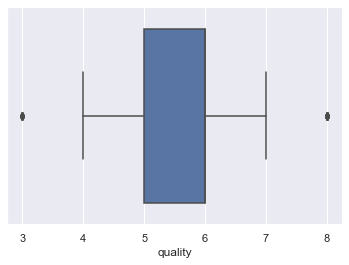

In [9]:
sns.boxplot(data=wine_data, x='quality')

The entries with the quality 3 or 8 are considered outliers, based on the graph. We can round them to 4 and 7 respectively.

In [10]:
wine_data['quality'][wine_data['quality']==3] = 4
wine_data['quality'][wine_data['quality']==8] = 7

We now view the boxplots for all other columns.

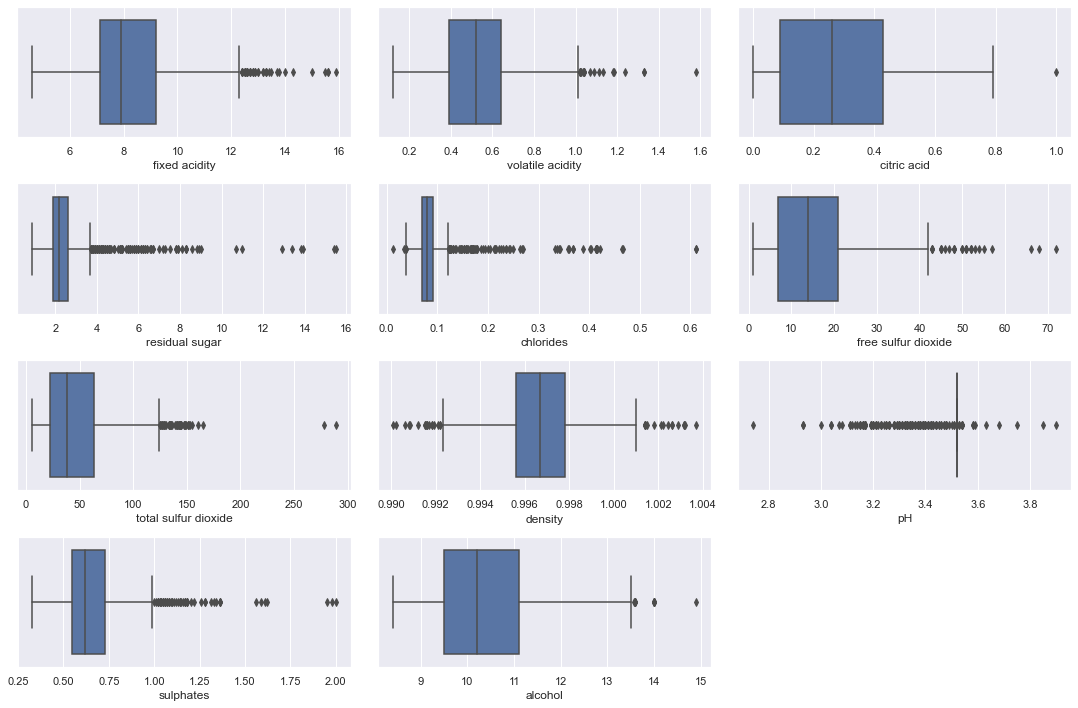

In [11]:
plt.figure(figsize=(15,10))
cols = wine_data.columns

for i in range(11):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=wine_data, x=cols[i])

plt.tight_layout()

> #### Observation:
> - The boxplot for the `pH` column seems to be wierd. We can use the `histplot()` to see the histogram of it.

<AxesSubplot:xlabel='pH', ylabel='Count'>

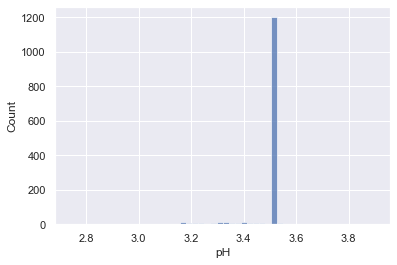

In [15]:
sns.histplot(data=wine_data, x='pH', bins=50)

> #### Observation:
There are 1200 entries with same `pH` value of 3.5. This is more than 85% of the dataset. ***This might be due to an error in the dataset.*** In a practical case of this type, we have 2 solutions:
> 
> 1. Re-collect the data.
> 2. Neglect it.
> 
> Since we cannot recollect the data, we will neglect it.

We now define a function `handle_outliers()` to handle the outliers.

In [16]:
def handle_outliers(data, column):
    q1, q3 = data[column].quantile([.25, .75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    data[column][data[column] < lower] = lower
    data[column][data[column] > upper] = upper

Call this function for every column in the dataset.

In [17]:
for col in cols:
    handle_outliers(wine_data, col)

We now display the boxplots once again to be sure.

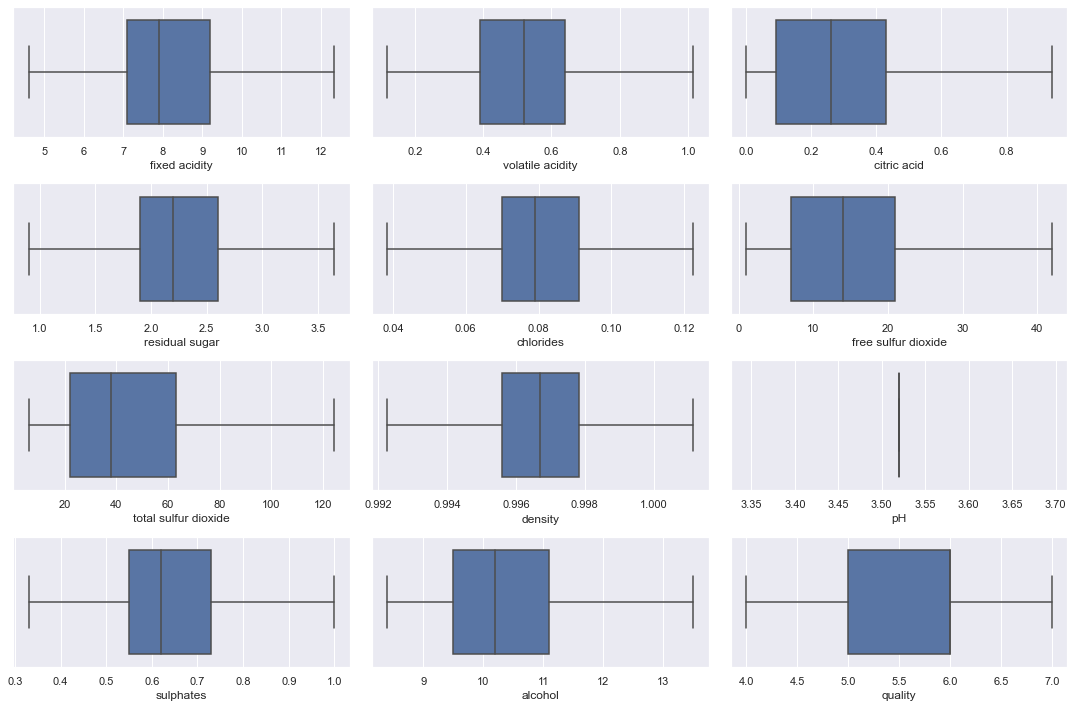

In [19]:
plt.figure(figsize=(15,10))
cols = wine_data.columns

for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=wine_data, x=cols[i])

plt.tight_layout()

All the outliers have been removed.

## Exploratory Data Analysis
In this section, we will try to answer several questions by visualising the data.